<a href="https://colab.research.google.com/github/Maxxx-VS/The-Founder/blob/master/%D0%9E%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8_(%D1%80%D1%83%D0%BA%D0%BE%D0%BF%D0%B8%D1%81%D0%BD%D1%8B%D0%B9_%D1%82%D0%B5%D0%BA%D1%81%D1%82).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install tensorflow
!pip install Keras

In [10]:
# Импортируем библиотеки
import numpy as np
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
# Загружаем данные
dataset = np.loadtxt('https://storage.yandexcloud.net/academy.ai/A_Z_Handwritten_Data.csv', delimiter=',')
X = dataset[:,1:785]
Y = dataset[:,0]
(train_images, train_labels, test_images, test_labels) = train_test_split(X, Y, test_size=0.2, shuffle=True)
print((train_images.shape), (train_labels.shape), (test_images.shape), (test_labels.shape))

(297960, 784) (74491, 784) (297960,) (74491,)


<ipython-input-14-8dea17b56ec5>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  im = plt.subplot(1, 5, i+1)


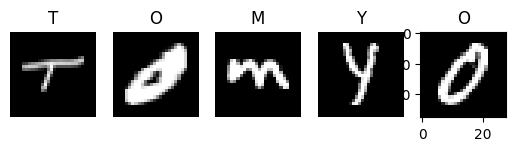

In [14]:
# Выводим часть ДС
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}
for i in range(5):
    x = train_images[i]
    x = x.reshape((28, 28))
    plt.axis('off')
    im = plt.subplot(1, 5, i+1)
    plt.title(word_dict.get(test_images[i]))
    im.imshow(x, cmap='gray')

In [33]:
# Моделирование НС
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(260, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(26, activation='softmax'))
# Компиляция модели
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
# изменение формы тензора
train_images = train_images.reshape(297960, 784)
train_images = train_images.astype('float32') / 255

# изменение формы тензора
test_images = test_images.reshape(297960,)
test_images = test_images.astype('float32') / 255

In [35]:
# def to_one_hot(labels, dimension=26): # dimension - число классов
#     results = np.zeros((len(labels), dimension))
#     for i, label in enumerate(labels):
#         results[i, label] = 1.
#     return results

In [32]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels, 26) # Кодируем обучающие метки на 26 классов
test_labels = to_categorical(test_labels, 26)   # Кодируем тестовые метки на 26 классов

IndexError: index 36 is out of bounds for axis 1 with size 26

In [36]:
# Обучение и оценка модели
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=5, batch_size=128)

ValueError: Data cardinality is ambiguous:
  x sizes: 297960
  y sizes: 74491
Make sure all arrays contain the same number of samples.

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Точность на тестовом образцу:', test_acc)
print('Потери на тестовом образце:', test_loss)

In [ ]:
# Массив из одного примера, так как нейронка принимает именно массивы примеров (батчи) для распознавания
x = np.expand_dims(x, axis=0)

# Проверка формы данных
print(x.shape)

In [ ]:
# Предсказываем выбранную картинку
prediction = model.predict(x)

# Вывод результата - вектор из 10 чисел
print(f'Вектор результата на 10 выходных нейронах: {prediction}')

# Получение и вывод индекса самого большого элемента (это значение цифры, которую распознала сеть)
pred = np.argmax(prediction)
print(f'Распознана цифра: {pred}')
print(f'Правильное значение: {np.argmax(test_labels[n])}')

In [ ]:
history_dict = history.history
history_dict.keys()

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Потери на обучающей выборке')
plt.plot(epochs, val_loss_values, 'b', label='Потери на тестовой выборке')
plt.title('График потерь')
plt.xlabel('Эпоха обучения')
plt.ylabel('Потери')
plt.legend()
plt.show()

In [ ]:
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Точность на обучающей выборке')
plt.plot(epochs, val_acc_values, 'b', label='Точность на тестовой выборке')
plt.title('График точности')
plt.xlabel('Эпоха обучения')
plt.ylabel('Точность')
plt.legend()
plt.show()